In [2]:
import numpy as np
import pandas as pd
import os
import PIL, PIL.Image
import base64
import io, math

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# ascii_characters_by_surface = "`^\",:;Il!i~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"

ascii_characters_by_surface = ''.join(["@", "#", "S", "%", "?", "*", "+", ";", ":", ".", " "])

def convert_to_ascii_art(image, h, w):
    ascii_art = []
    image = image.resize((h, w))
    (width, height) = image.size
    for y in range(0, height - 1):
        line = ''
        for x in range(0, width - 1):
            px = image.getpixel((x, y))
            line += convert_pixel_to_character(px)
        ascii_art.append(line)
    return ascii_art


def convert_pixel_to_character(pixel):
    (r, g, b, a) = pixel
    pixel_brightness = r + g + b
    max_brightness = 255 * 3
    brightness_weight = len(ascii_characters_by_surface) / max_brightness
    index = int(pixel_brightness * brightness_weight) - 1
    return ascii_characters_by_surface[index]

In [4]:
emoji_data = pd.read_csv('./emoji/full_emoji.csv')

In [5]:
emoji_data.head()


,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [6]:
base64_decoded = base64.b64decode(emoji_data['Apple'][0].split(',')[-1])


In [7]:
base64_decoded

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00H\x00\x00\x00H\x08\x03\x00\x00\x00b3Cu\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x01\x02PLTEGpL\xc6\x81(\xc6h\x07\xcc| \xc7o\x12\xf3\x8c\x03\xe4\x8d$\xc9}\'\xba\x876\xc6q\x17\xd1|\x1e\xc7n\x11\xf2\x8c\x0e\xe4\x89\x1e\xed\x8f\x18\xcbm\x0b\xc7k\x0b\xa6g\x07\xff\xdb2\xef\x9c\x0f\xff\xd0/\xff\xd70\xff\xc8,\xff\xb8\x1f\xff\xf7x\xff\xf8\x8a\xfc\xaf\x16\xf5\xa5\x12\xff\xf9\x9b\xff\xbf+\xff\xf6g\xff\xe22\xe2\x8d\n\xe7\x95\x0e\xff\xfe\xde\xff\xfb\xaa\xff\xf2T\xff\xed>\xff\xfd\xca\xff\xfc\xb9\xd8}\x06\xdd\x86\x08\xd5t\x02\x9d`\x07\x93V\x05\x89L\x03\xff\xe4K\xd2\xd5\xd7\xfa\xfc\xfc\xff\xdc>\xf0\xf2\xf3\xff\xa8\x05\xfd\x97\x04\xff\xe1]\xff\xe7n\x80C\x04\xe3\xe6\xe8\xcaj\x03b+\x01\xff\xd6M\xff\xcb=\xff\xb9\x07\xff\xc8\x08o9\t\xff\xec\x82\xe1z\x02\xae\x9d\x8d\xf5\xb7\'\xbc\x84\x18\xe8\xab#\xbf\xb2\xa6\xd5\x99\x1f\xff\xd6\r\xe1\xc76{O*\x88dF\xc6\xa6*\xacz\x16\xc6\xc4\xc1\xa3n\x13\x9d\x84n\x99w[V!\x

In [8]:
image = PIL.Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
image.width

resized = image.resize((72, 72))

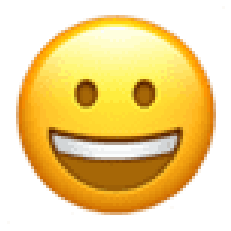

In [9]:
plt.imshow(resized)
plt.axis('off')

plt.savefig('brow.png', transparent=True, bbox_inches='tight')


In [13]:
test = convert_to_ascii_art(image, 60, 30)

In [14]:
for line in test:
    print(line)

                       %?????*??????%                      
                  ????*******+********????                 
              S??****+;;:::......:::;;++**???S             
            ???**+;::...................:;+**???           
          ???*+;::....................:;;;::;+*???         
        ???*+;:::::::::::::::::::::;*?SSSSS%+:;+*???       
       ??**+;::::::::::::::::::::*SSS?+;;;;*%+::;**??%     
     %??**;;;;;;:::::::::::::::::;+;::::::::;;;;;;+*??%    
    S??**;;;;;;+*%%%?*+;;;;;;;;;;;:;;;;;;;;;;;;;;;;+*??%   
    ??**++++;;?SS%??%SSSSS%+;;;;;;;;;*??*;;;;;;;;+++**??   
   %??*+++++++++;;;;++++***;;;;;;;;+%####?+;+++++++++*??%  
  ????*+++++++++++%S##S%+;;;;;+;;+;*#SSSSS*++++++++++**??? 
  ????**+++++++++%#SSSS#?++++++++++*SSSSSS*+++++++++***??? 
  %%??***++++++++*%SSSS%*+++++++++++?SSSS?+++++++++***??%% 
  %%??****+++++++++****++++++++++++++*??++++++++++****??%% 
  ?%??****++++++++++++++++++++++++++++++++++++++++****??%% 
  ?%???****+++++++++++++++++++++++++++++

In [209]:
for line in test:
    print(line)

                                                           
                                                           
                                                           
                                                           
                                                           
            @%%% SSS                                       
          %S%??%S%??%#                                     
  @SSS%%%%%%%%%SS%?*?S                                     
%%??????%SSS??SSS%**%##     @S%%%%%%%%%%%%%S               
S%*++*****?*???%%%%SS%%%%%%S%%%%????????%%%%%%%S           
 %%%%??******???%%S%%???????????********???%%%%%%%         
   ##SS%??*??????????**********************??%%%%%%%       
    SSSSSS%%%%%???******++++*******+*++*****????%%%%%S     
        @#SSSS%???****++++++****+++++++*******????%%%%S    
           SSSS%??*****++++******+*++++***********??%%%    
            SSSS%???******************++**+++++****??%%%   
             SSSS%%????*?????????*******

In [234]:
# print(emoji_data.columns[4:])

emoji_type = list(emoji_data.columns[4:])

emoji_type

['Apple',
 'Google',
 'Facebook',
 'Windows',
 'Twitter',
 'JoyPixels',
 'Samsung',
 'Gmail',
 'SoftBank',
 'DoCoMo',
 'KDDI']

In [235]:
data = []
for row in range(emoji_data.shape[0]):
    entry = emoji_data.iloc[row]
    # print(entry)
    # print(emoji_type)
    for company in emoji_type:
        # print(company)
        # print(entry[company])
        try:
            decoded = base64.b64decode(entry[company].split(',')[-1])
            img = PIL.Image.open(io.BytesIO(decoded)).convert("RGBA")

            ASCII = convert_to_ascii_art(img, 60, 30)
            # print(ASCII)
            entry[company + "_ASCII"] = '\n'.join(ASCII)
        except:
            entry[company + "_ASCII"] = math.nan
    data.append(entry)


# print(data)

df = pd.DataFrame(data)

df.head()
df.shape

# print(test2.iloc[0]['Twitter_ASCII'])





(1816, 26)

In [236]:
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,...,Google_ASCII,Facebook_ASCII,Windows_ASCII,Twitter_ASCII,JoyPixels_ASCII,Samsung_ASCII,Gmail_ASCII,SoftBank_ASCII,DoCoMo_ASCII,KDDI_ASCII
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S??******??S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,...,NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S?*?****?*?S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,...,...,...
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S**********S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S**********S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,...,...
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S?********?S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,%???????????????????????????????????????????...,NaN,...,NaN


In [237]:
df.to_csv("full_emoji_parsed.csv")

In [214]:
t2 = pd.read_csv("full_emoji_parsed.csv")

t2.shape

(1816, 27)